# Introduction
Many businesses are very seasonal, and some of them make money during holidays like Christmas, Haloween, New Year's day, Easter, and Boxing day. In addition, they use sales promotions to increase the demand for or visibility of a product or service for several weeks during the year.

In this project, we are going to analyze the historical data using time series analysis techniques, with promotion effect.

The data that will be used is a weekly sales and price data for 9 stores and 3 products. At the end, we will also forecast the sales for next 50 weeks for one of the three products at one of the stores.

# The Data
`Store`: the store code. We have 9 stores in total.

`Product`: the product code. We have 3 products in total.

`Is_Holiday`: an indicator for whether that week contains holiday: 0 = no, 1 = yes.

`Base Price`: base or everyday price without discount.

`Price`: Actual price for each week. They are either promotion prices when promotion is going on or everyday prices otherwise.

`Weekly_Units_Sold`: Weekly units sold.

## 0. Import Libraries

In [1]:
import plotly.express as px
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.distributions.empirical_distribution import ECDF
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


## 1. Data Preprocessing

Here new feature like weekly sales amount in dollars, year, month, day, week of year are added to simplify analysis.

In [2]:
df = pd.read_csv('data/Sales_Product_Price_by_Store.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['weekly_sales'] = df['Price'] * df['Weekly_Units_Sold']
df.set_index('Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

# 2. EDA
To get the first impression about continuous variables in the data we are going to plot ECDF.

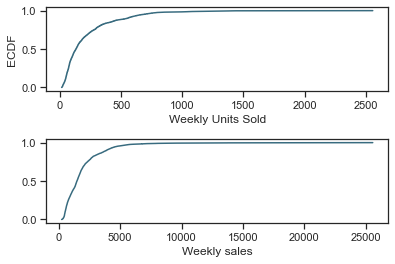

In [3]:
sns.set(style = "ticks")
c = '#386B7F' 
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)
plt.subplot(211)
cdf = ECDF(df['Weekly_Units_Sold'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly Units Sold'); plt.ylabel('ECDF');

plt.subplot(212)
cdf = ECDF(df['weekly_sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Weekly sales');

<ul>
    <li>Although in the best week, a store sold more than 2500 units, about 80% of the time, weekly units sold did not exceed 500.</li>
    <li>Although the highest weekly sales exceeded 25K dollars, over 90% of the data had weekly sales less than 5K dollars.</ul>

In [4]:
df.groupby('Store')['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
1,429.0,1789.414172,900.074226,769.65,1208.90,1659.17,1957.20,6816.59
2,429.0,2469.447413,1328.162884,1143.48,1579.21,2215.08,2756.55,9110.00
3,429.0,670.924009,366.816321,229.77,459.77,619.69,730.78,2650.00
4,429.0,3078.462145,1746.147872,1099.45,1818.18,2626.61,3837.51,13753.12
5,429.0,588.922984,242.628977,285.87,461.23,519.74,613.53,2264.97
6,429.0,2066.705082,1163.284768,890.19,1418.58,1758.40,2156.40,7936.03
7,429.0,955.115058,489.084883,389.61,649.35,857.61,1041.51,3270.00
8,429.0,1352.094056,811.326288,516.53,846.23,1275.87,1491.51,6656.67
10,429.0,4093.407249,3130.087191,1483.65,2462.88,3707.81,4510.47,25570.00


In [5]:
df.groupby('Store')['Weekly_Units_Sold'].sum()

Store
1      86699
2     121465
3      31689
4     158718
5      27300
6      97698
7      44027
8      65273
10    200924
Name: Weekly_Units_Sold, dtype: int64

<ul>
    <li>It is easy to see that Store 10 has the highest average weekly sales among all 9 stores, also Store 10 has the most total weekly units sold.</li>
    <li>And Store 5 has the lowest average weekly sales.</li>
    <li>Apparently, Store 10 is the most selling and crowded one.</li>
</ul>

C:\Users\samue\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


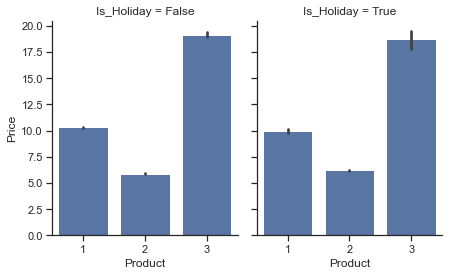

In [6]:
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Price");

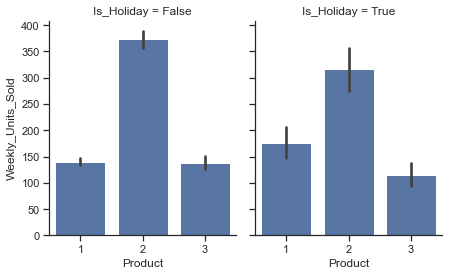

In [7]:
g = sns.FacetGrid(df, col="Is_Holiday", height=4, aspect=.8)
g.map(sns.barplot, "Product", "Weekly_Units_Sold");

<ul>
<li> Product 2 is the cheapest product among all the three products, and it sells the most.</li>
<li>Product 3 is the most expensive product among all the three products.</li>
<li>In addition, product price did not change during holidays.</li>
</ul>

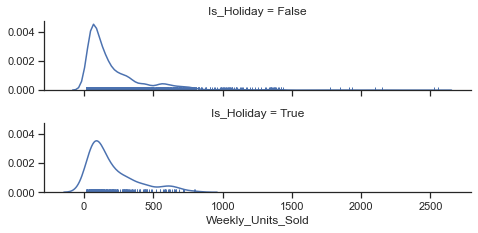

In [8]:
g = sns.FacetGrid(df, row="Is_Holiday",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "Weekly_Units_Sold", hist=False, rug=True);

C:\Users\samue\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


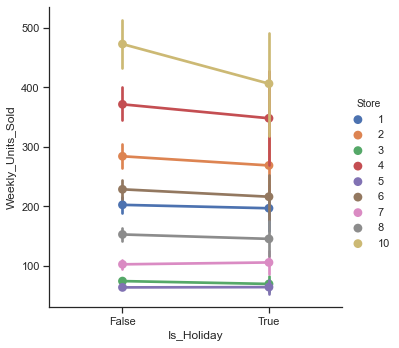

In [9]:
sns.factorplot(data= df, 
               x= 'Is_Holiday',
               y= 'Weekly_Units_Sold',
               hue= 'Store');

C:\Users\samue\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


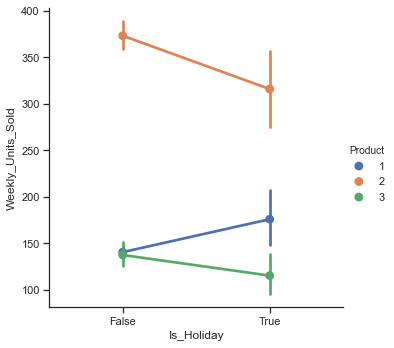

In [10]:
sns.factorplot(data= df, 
               x= 'Is_Holiday',
               y= 'Weekly_Units_Sold',
               hue= 'Product');

<ul>
<li> It does not seem that holidays have a positive impact for the business. For most of the stores, weekly unit sold during the holiday is as same as the normal days, while store 10 had a decrease during the holidays. </li>
<li> Weekly units sold for product 1 had a slightly increase during the holidays, while product 2 and product 3 had a decrease during the holidays.</li>
</ul>

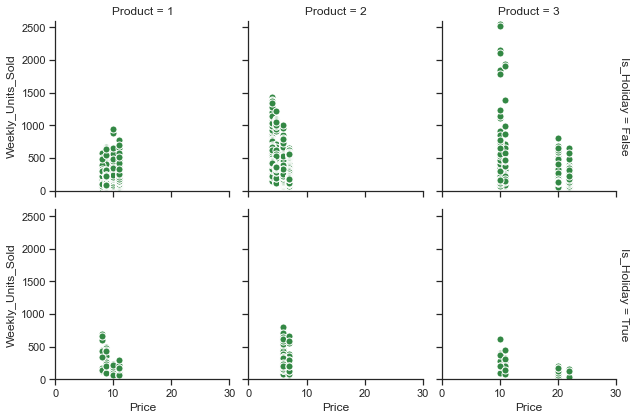

In [11]:
g = sns.FacetGrid(df, col="Product", row="Is_Holiday", margin_titles=True, height=3)
g.map(plt.scatter, "Price", "Weekly_Units_Sold", color="#338844", edgecolor="white", s=50, lw=1)
g.set(xlim=(0, 30), ylim=(0, 2600));

<ul> 
<li>Every product has more than one prices, both at holidays and normal days. I guess one is regular price, another is promotional price.</li>
<li>The price gap for product 3 is huge, it was slashed to almost 50% off during promotions.</li>
<li>Product 3 made the most sales during non-holidays.</li>
</ul>

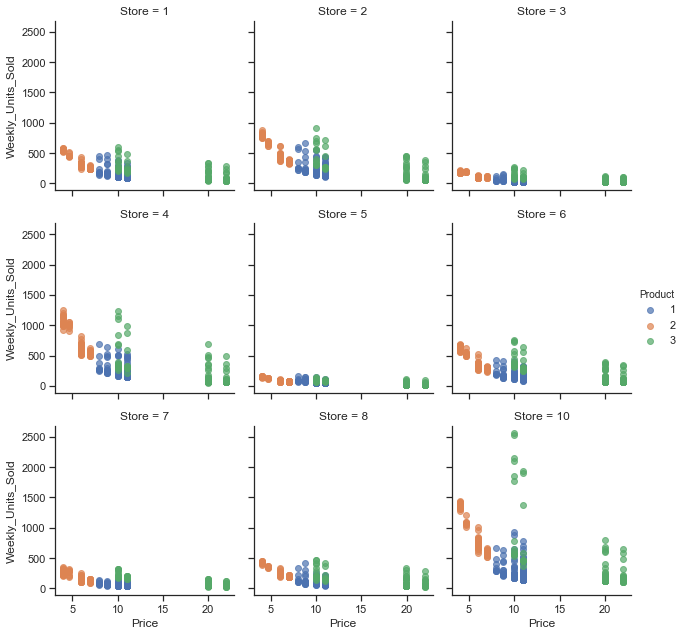

In [12]:
g = sns.FacetGrid(df, col="Store", hue="Product", margin_titles=True, col_wrap=3)
g.map(plt.scatter, 'Price', 'Weekly_Units_Sold', alpha=.7)
g.add_legend();

All of these 9 stores carry these 3 products. They all seem to have similar kind of discount promotions. However, product 3 sells the most units during promotions at store 10.

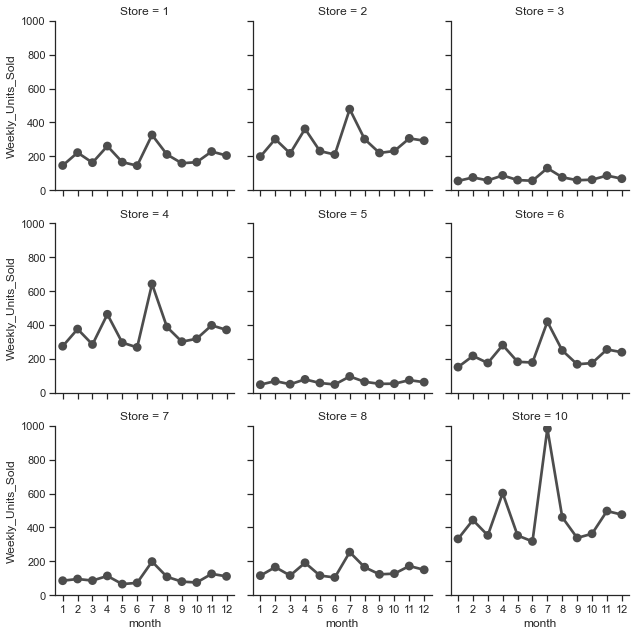

In [13]:
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 1000))
g.map(sns.pointplot, "month", "Weekly_Units_Sold", color=".3", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

Every store has some form of seasonality, store 10 has the most obvious seasonal pattern.

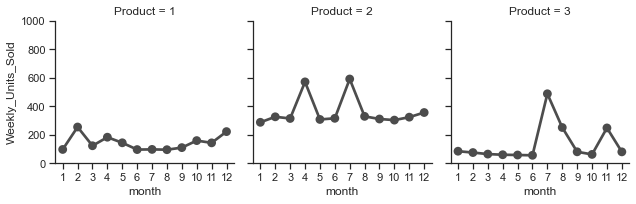

In [14]:
g = sns.FacetGrid(df, col="Product", col_wrap=3, height=3, ylim=(0, 1000))
g.map(sns.pointplot, "month", "Weekly_Units_Sold", color=".3", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12]);

Every product has somewhat seasonality, product 2 has two peak seasons per year and product 3 has one.

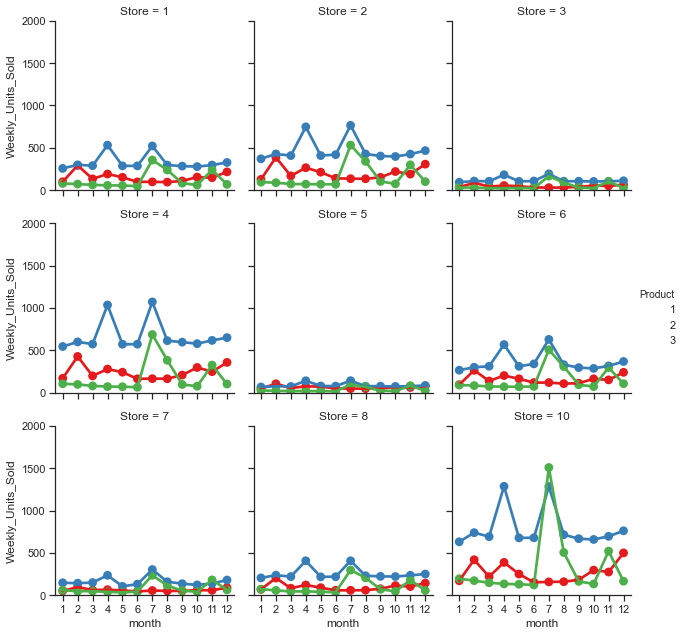

In [15]:
g = sns.FacetGrid(df, col="Store", col_wrap=3, height=3, ylim=(0, 2000), hue='Product', palette="Set1")
g.map(sns.pointplot, "month", "Weekly_Units_Sold", ci=None, order = [1,2,3,4,5,6,7,8,9,10,11,12], alpha=.7)
g.add_legend();

<li>In general, product 2 sells more units per week than the other products in every store.
<li>Once a while, product 3 would exceed product 2 at store 1

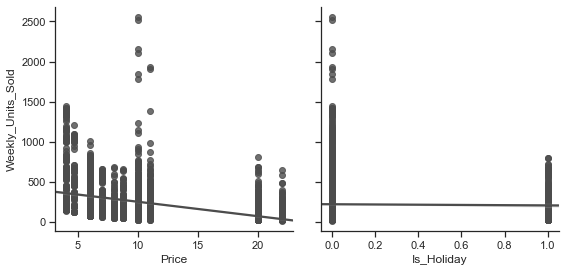

In [16]:
g = sns.PairGrid(df, y_vars=["Weekly_Units_Sold"], x_vars=["Price", "Is_Holiday"], height=4)
g.map(sns.regplot, color=".3");

<li>The cheaper the price, the more weekly units were sold.
<li>Is holiday or not has nothing to do with the unit sold.


Here we are adding a new column called “promotion”, which was derived from “Base Price” and “Price”.

In [17]:

def f(row):
    if row['Base Price'] == row['Price']:
        val = 0
    elif row['Base Price'] > row['Price']:
        val = 1
    else:
        val = -1
    return val
df['promotion'] = df.apply(f, axis=1)

C:\Users\samue\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


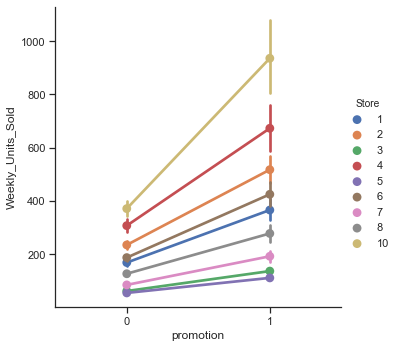

In [18]:
sns.factorplot(data= df, 
               x= 'promotion',
               y= 'Weekly_Units_Sold',
               hue= 'Store');

Every store sells more during the promotions, there is no exception.

C:\Users\samue\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


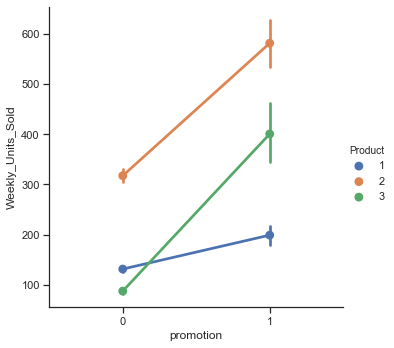

In [19]:
sns.factorplot(data= df, 
               x= 'promotion',
               y= 'Weekly_Units_Sold',
               hue= 'Product');

Every product sells more during the promotions, in particular, product 2 and product 3.

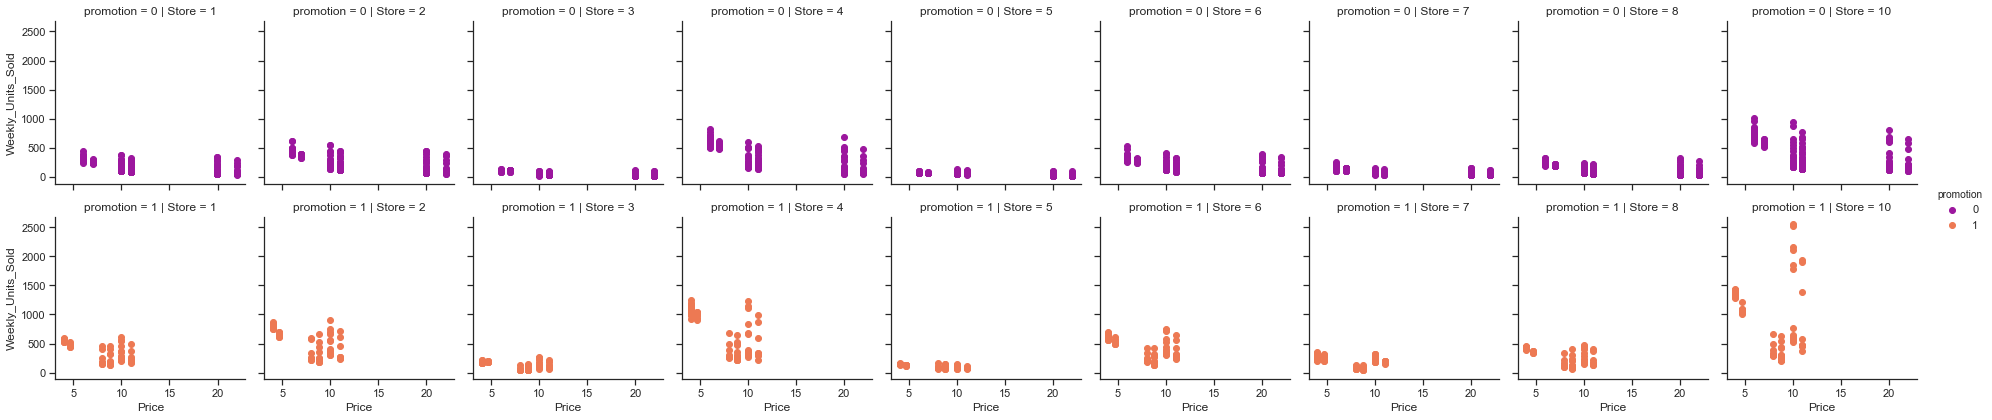

In [20]:
g = sns.FacetGrid(df, col="Store", hue="promotion", palette = 'plasma', row='promotion')
g = (g.map(plt.scatter, "Price", "Weekly_Units_Sold")
     .add_legend())

All the stores have the similar price promotion pattern, for some reason, store 10 sells the most during the promotions.

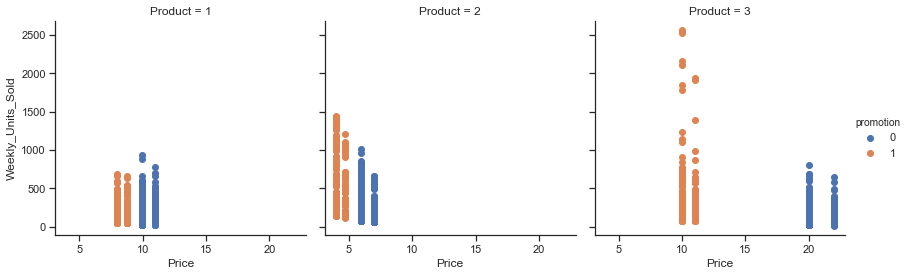

In [26]:
g = sns.FacetGrid(df, hue="promotion", col="Product", height=4)
g.map(plt.scatter, "Price", "Weekly_Units_Sold")
g.add_legend();

Every product has the regular price and promotional price. Product 3 has the highest discount and sells the most during the promotions.

# Observations

<li>The most selling and crowded Store is Store 10, and the least crowded store is Store 5.
<li>In terms of number of units sold, the most selling product is product 2 throughout the year.
<li>Stores do not necessarily run product promotions during holidays. Holidays do not seem to have an impact on stores or products performance.
<li>Product 2 seems to be the cheapest product, and Product 3 is the most expensive product.
<li>Most stores have some kind of seasonality and they have two peak seasons per year.
<li>Product 1 sells a little more in February than the other months, Product 2 sells the most around April and July, and <li>Product 3 sells the most around July to September.
<li> Each product has its regular price and promotional price. There isn’t significant gap between regular price and promotional price on Product 1 and Product 2, however, Product 3’s promotional price can be slashed to 50% of its original price. Although every store makes this kind of price cut for product 3, store 10 is the one made the highest sales during the price cut.</li>
<li>It is nothing unusual to sell more during promotion than the normal days. Store 10’s made Product 3 the best selling product around July to September.